## SENTIMENT ANALYSIS ASSIGNMENT


Anurag Pandey(23PGAI0059)

Bishwanath Roul(23PGAI0040)

Solomon Amaning Odum (23PGAI0119)


### Brief description of the project

#### Exploratory Data Analysis (EDA):

Perform EDA on the collected dataset to understand its structure and characteristics.
Identify key features and columns that carry sentiment information.
Gain insights into the sentiment-carrying columns.
Data Preprocessing:

#### Preprocess the text data to prepare it for sentiment analysis.
Perform tasks such as tokenization, removing stop words, and handling data noise or inconsistencies.
Feature Transformation:

#### Transform the sentiment-carrying columns into appropriate numerical representations.
Choose suitable techniques to convert text data into features for machine learning models.
Model Selection:

#### Select a supervised machine learning model or classifier for sentiment prediction.
Given the sequential nature of text data, consider utilizing a Recurrent Neural Network (RNN) for its ability to capture contextual information effectively.
Model Training:

#### Train the selected model using the transformed data.
Employ appropriate training techniques like cross-validation and hyperparameter tuning.
Sentiment Prediction:

#### Utilize the trained model to predict sentiment for new, unseen data points.
Apply the model to analyze sentiment in various sources amazon reviews dataset
Evaluation:

#### Evaluate the performance of the sentiment prediction model using relevant metrics like accuracy, precision, recall, and F1-score.
Assess how well the model generalizes to new data and measures its effectiveness in predicting sentiment.
Fine-tuning and Improvements:

#### Fine-tune the model based on evaluation results and feedback.
Explore potential improvements to enhance the model's performance and address any limitations or challenges encountered.
By following this pipeline, we can develop an effective sentiment analysis and prediction system that can process text data, transform it into numerical representations, train a model, and make accurate sentiment predictions for new data points.

In [2]:
%%capture
!pip install wordcloud

In [2]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (
    TfidfVectorizer,
    CountVectorizer,
    ENGLISH_STOP_WORDS,
)
from wordcloud import WordCloud
from functools import reduce
from nltk import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

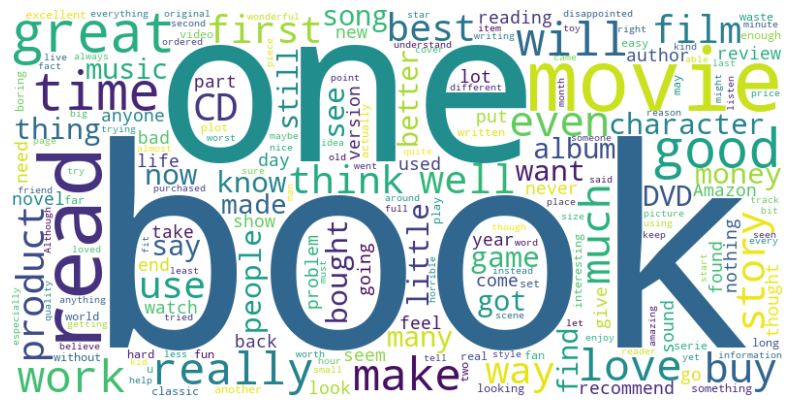

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"E:\\Study\\NLP\\Sentiment-Analysis-main\\reviews.csv")

# Concatenate all the reviews into a single string
text = ' '.join(df['review'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Loading the data (reviews)
The data has textual value and an indication of the sentiment (0 = negative, 1 = positive)

In [4]:
df=pd.read_csv(r"E:\\Study\\NLP\\Sentiment-Analysis-main\\reviews.csv", index_col = 0)

In [5]:
df.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [6]:
df.describe()

,score
count,10000.000000
mean,0.490300
std,0.499931
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   10000 non-null  int64 
 1   review  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [8]:
df

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."
...,...,...
9995,1,A revelation of life in small town America in...
9996,1,Great biography of a very interesting journal...
9997,0,Interesting Subject; Poor Presentation: You'd...
9998,0,Don't buy: The box looked used and it is obvi...


## Word cloud and Feature Creation

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import ImageFont

In [10]:
positive_reviews = df[df["score"] == 1]["review"][:100]  # Filter positive reviews
positive_text = ' '.join(str(positive_reviews))  # Concatenate the positive reviews into a single string



### Tokenize each word

In [11]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in df["review"]]

# Create a new feature for the lengh of each review
df["n_words"] = [len(word_tokens[i]) for i in range(len(word_tokens))]

df

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109
...,...,...,...
9995,1,A revelation of life in small town America in...,175
9996,1,Great biography of a very interesting journal...,153
9997,0,Interesting Subject; Poor Presentation: You'd...,122
9998,0,Don't buy: The box looked used and it is obvi...,33


### Building a vectorizer
We use the Tfidf Vectorizer to transform the data into numerical values that can be used to make predictions

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# Build the vectorizer
vect = TfidfVectorizer(
    stop_words=list(ENGLISH_STOP_WORDS),  # Default list of English stop words
    ngram_range=(1, 2),  # Consider Uni- and Bi-grams
    max_features=200,  # Max number of features
    token_pattern=r"\b[^\d\W][^\d\W]+\b",  # Capture only words using this pattern
)  

X = vect.fit_transform(df['review'])

# Create sparse matrix from the vectorizer
X = vect.transform(df.review)

# Create a DataFrame
df_transformed = pd.DataFrame(data=X.toarray(), columns=vect.get_feature_names_out())
df_transformed

,able,action,actually,ago,album,amazing,amazon,author,away,bad,...,work,works,world,worst,worth,writing,written,wrong,year,years
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.274041,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,0.0,0.0,0.0,0.0,0.0,0.382773,0.000000,0.000000,0.000000,0.0,...,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.308646,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.143748,0.0,0.0,0.0,0.0,0.000000
9996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.211433,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.261721,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


### Building a classifier (logistic Regression)
We use a logistic regression to predict the sentiment of unseen data. Visualize the errors your classifier makes with a confusion matrix.

In [14]:
dropped = df.drop(["review", "n_words"], axis=1)
transformed = pd.concat([dropped, df_transformed], axis=1)
transformed

,score,able,action,actually,ago,album,amazing,amazon,author,away,...,work,works,world,worst,worth,writing,written,wrong,year,years
0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.274041,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885
2,1,0.0,0.0,0.0,0.0,0.0,0.382773,0.000000,0.000000,0.000000,...,0.142935,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410
3,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.308646,0.000000,...,0.000000,0.0,0.0,0.0,0.143748,0.0,0.0,0.0,0.0,0.000000
9996,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.211433,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9997,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.261721,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9998,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [15]:
# Define X and y
y = transformed["score"]
X = transformed.drop("score", axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # Set size of test_set
    random_state=456,  # Random seed for reproducibility
)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)

# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print("Accuracy on the test set: ", accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted) / len(y_test))

Accuracy on the test set:  0.789
[[0.412 0.114]
 [0.097 0.377]]
